In [96]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import scipy
import scipy.optimize
import dlsfunctions as dls
import pandas as pd

In [2]:
dls_data = np.loadtxt("2015_07_22_Eonly0005_MILLISECONDS.asc", encoding='latin1', skiprows=28, max_rows=214)

In [3]:
tau = dls_data[:,0]
intensity = dls_data[:,1]

In [4]:
popt, pcov = scipy.optimize.curve_fit(dls.single_exponential_fit, tau, intensity)

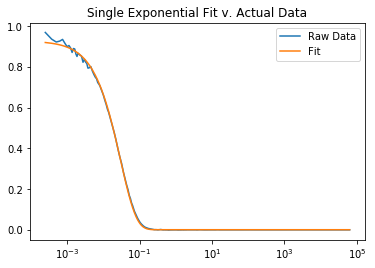

In [6]:
plt.semilogx(tau, intensity, label='Raw Data')
plt.semilogx(tau, dls.single_exponential_fit(tau, popt[0], popt[1], popt[2]), label='Fit')
plt.title("Single Exponential Fit v. Actual Data")
plt.legend()

In [57]:
m = 214
c = 1
eta = 1e-3
n = 1.33
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0, beta)

In [58]:
r = dls.determine_radius(popt[0], n, lambda_0, theta, eta, k_b, t)
r

2.2439608235145855e-09

In [59]:
diameter = r*2

In [60]:
d = np.linspace(1e-9, 1e-8,20)
sigma = 5e-10

In [61]:
distribution1 = dls.generate_distribution(d, diameter, sigma, 1)

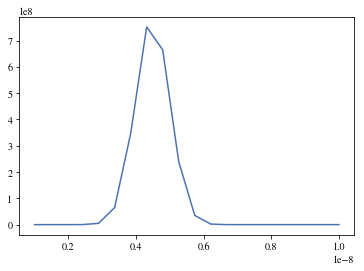

In [62]:
plt.plot(d, distribution1)

In [63]:
dls.check_distribution_norm(distribution1, d[1] - d[0])

1.0

In [78]:
ndim = 20
nwalkers = 100
nsteps = 800

In [79]:
prelim_pos = distribution1
start_pos = [prelim_pos + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [80]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d,intensity, gamma, 214, tau))

In [81]:
%time result = sampler.run_mcmc(start_pos, nsteps)

CPU times: user 3min 29s, sys: 1.09 s, total: 3min 30s
Wall time: 3min 30s


In [82]:
sampler.acceptance_fraction

array([0.3875 , 0.38875, 0.3325 , 0.3675 , 0.36875, 0.37875, 0.37875,
       0.39   , 0.36   , 0.34375, 0.4075 , 0.4    , 0.38375, 0.35   ,
       0.37125, 0.385  , 0.37   , 0.375  , 0.3925 , 0.36   , 0.32875,
       0.3425 , 0.36875, 0.35   , 0.375  , 0.39375, 0.38375, 0.3825 ,
       0.36125, 0.3875 , 0.36875, 0.40375, 0.35875, 0.36625, 0.34375,
       0.36625, 0.37125, 0.36875, 0.36   , 0.33375, 0.3625 , 0.355  ,
       0.3875 , 0.37375, 0.405  , 0.335  , 0.3625 , 0.355  , 0.39375,
       0.36   , 0.38125, 0.3325 , 0.36   , 0.38   , 0.35125, 0.3675 ,
       0.37375, 0.3375 , 0.36125, 0.37875, 0.335  , 0.37   , 0.36   ,
       0.3675 , 0.36125, 0.37875, 0.33375, 0.4    , 0.32625, 0.33625,
       0.39875, 0.3925 , 0.37875, 0.36875, 0.33625, 0.3875 , 0.38125,
       0.37   , 0.40625, 0.37125, 0.33875, 0.4    , 0.39125, 0.3575 ,
       0.33875, 0.39375, 0.35   , 0.3625 , 0.39   , 0.36625, 0.35125,
       0.3575 , 0.37   , 0.37875, 0.3575 , 0.36625, 0.35125, 0.38625,
       0.4125 , 0.34

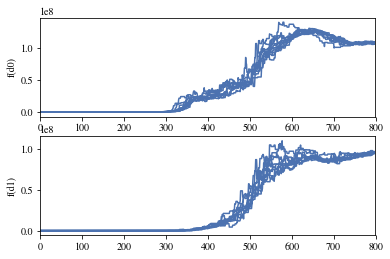

In [83]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

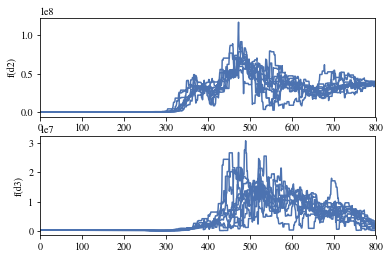

In [84]:
fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

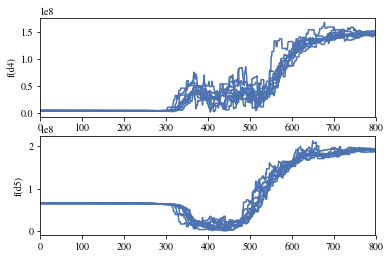

In [85]:
fig, (ax4, ax5) = plt.subplots(2)
ax4.set(ylabel='f(d4)')
ax5.set(ylabel='f(d5)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 4], ax=ax4)
    sns.tsplot(sampler.chain[j, :, 5], ax=ax5)

In [86]:
# Nope nevermind this won't work

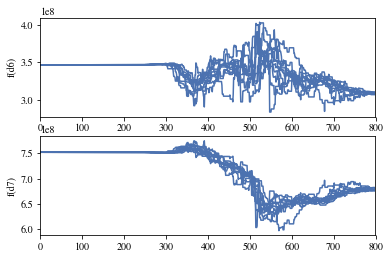

In [87]:
fig, (ax6, ax7) = plt.subplots(2)
ax6.set(ylabel='f(d6)')
ax7.set(ylabel='f(d7)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 6], ax=ax6)
    sns.tsplot(sampler.chain[j, :, 7], ax=ax7)

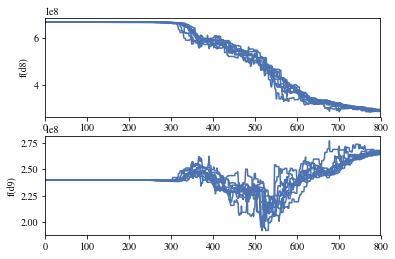

In [88]:
fig, (ax8, ax9) = plt.subplots(2)
ax8.set(ylabel='f(d8)')
ax9.set(ylabel='f(d9)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 8], ax=ax8)
    sns.tsplot(sampler.chain[j, :, 9], ax=ax9)

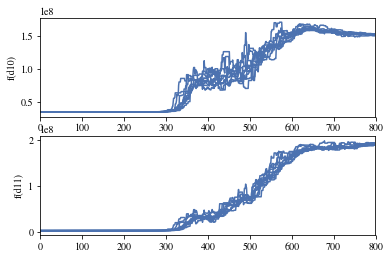

In [90]:
fig, (ax10, ax11) = plt.subplots(2)
ax10.set(ylabel='f(d10)')
ax11.set(ylabel='f(d11)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 10], ax=ax10)
    sns.tsplot(sampler.chain[j, :, 11], ax=ax11)

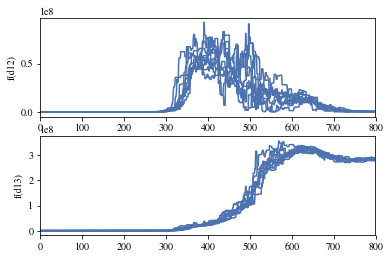

In [91]:
fig, (ax12, ax13) = plt.subplots(2)
ax12.set(ylabel='f(d12)')
ax13.set(ylabel='f(d13)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 12], ax=ax12)
    sns.tsplot(sampler.chain[j, :, 13], ax=ax13)

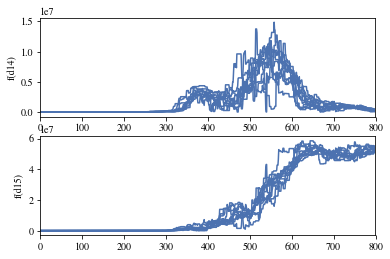

In [92]:
fig, (ax14, ax15) = plt.subplots(2)
ax14.set(ylabel='f(d14)')
ax15.set(ylabel='f(d15)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 14], ax=ax14)
    sns.tsplot(sampler.chain[j, :, 15], ax=ax15)

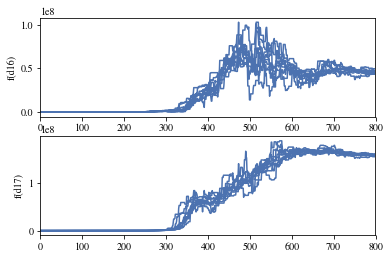

In [93]:
fig, (ax16, ax17) = plt.subplots(2)
ax16.set(ylabel='f(d16)')
ax17.set(ylabel='f(d17)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 16], ax=ax16)
    sns.tsplot(sampler.chain[j, :, 17], ax=ax17)

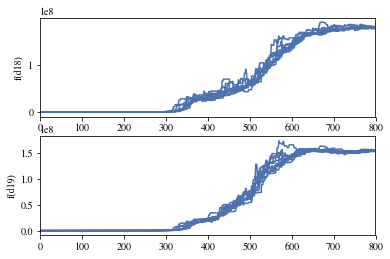

In [94]:
fig, (ax18, ax19) = plt.subplots(2)
ax18.set(ylabel='f(d18)')
ax19.set(ylabel='f(d19)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 18], ax=ax18)
    sns.tsplot(sampler.chain[j, :, 19], ax=ax19)

In [103]:
# walkers seemed to take about 600 to 700 steps to settle
samples = sampler.chain[:,750:,:]

# reshape the samples into a 1D array where the colums are f(D) values
traces = samples.reshape(-1, ndim).T

print traces.shape
print d.shape

(20, 5000)
(20,)


Text(0.5,0,'Diameter in m')

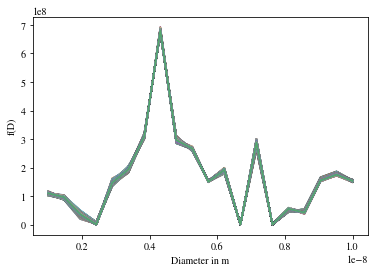

In [100]:
plt.plot(d, traces)
plt.ylabel('f(D)')
plt.xlabel('Diameter in m')

In [ ]:
# perhaps we should infer beta?